## Consensus Trees from Maximum Likehood Method K2P
Here we will visualize the consensus trees file generated by IQ-TREE, UPGMA and NJ using DendroPy.


In [ ]:
%pip install dendropy
%pip install --upgrade pip

In [1]:
#importing the libraries 
import os
import dendropy
import matplotlib.pyplot as plt
from ete3 import Tree, TreeStyle, NodeStyle
import tempfile

We combine the three categories of corrosion on a single plot that shows iqtree_1.contree no corrosion as green. Possible corrosion iqtree_2.contree and Corrosion is inminent iqtree_3.contree, for that we use ete3 library

In [5]:
#1. Read the trees using ete3
tree_1 = Tree("/home/beatriz/MIC/2_Micro/dataml/iqtree_1.contree")
tree_2 = Tree("/home/beatriz/MIC/2_Micro/dataml/iqtree_2.contree")
tree_3 = Tree("/home/beatriz/MIC/2_Micro/dataml/iqtree_3.contree")

In [14]:
print(tree_1)


   /-Burkholderiales_Comamonadaceae_Acidovorax
  |
  |                                                                                                /-Rhodocyclales_Rhodocyclaceae_Azospira
  |                                                                                               |
  |                                                                                               |                                                               /-Sphingomonadales_Sphingomonadaceae_Novosphingobium
  |                                                                                               |                                                            /-|
  |                                                                                               |                                                         /-|   \-Burkholderiales_Comamonadaceae_Aquabacterium
  |                                                                                               |                       

In [8]:
#color asignment
forest = [tree_1, tree_2, tree_3]
colors = ["green", "orange", "red"]

# Customize appearance of each tree
for tree, color in zip(forest, colors):
    for node in tree.traverse():
        ns = NodeStyle()
        ns["fgcolor"] = color
        ns["size"] = 10
        node.set_style(ns)

# Create a TreeStyle object to set the layout
ts = TreeStyle()
ts.mode = "r"  # rectangular mode
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True

# Combine trees in the same plot
combined_tree = Tree()
for tree in forest:
    combined_tree.add_child(tree)

# Render the combined tree
combined_tree.render("combined_trees.png", tree_style=ts, w=500, units="mm")

{'nodes': [[158.42891094396467,
   2942.778718575226,
   162.1920550853652,
   2946.5418627166264,
   0,
   None],
  [167.83677129746602,
   904.5657729891559,
   178.18541768631752,
   914.9144193780074,
   1,
   None],
  [183.83013389841835,
   8.937467335826293,
   194.17878028726983,
   19.28611372467779,
   2,
   None],
  [183.83013389841835,
   1747.5100604216937,
   194.17878028726983,
   1757.858706810545,
   3,
   None],
  [199.82349649937066,
   1721.1680511907055,
   210.17214288822217,
   1731.5166975795569,
   4,
   None],
  [215.81685910032297,
   1694.826041718533,
   226.16550548917448,
   1705.1746881073843,
   5,
   None],
  [231.81022170127528,
   1668.4840317639917,
   242.15886809012682,
   1678.832678152843,
   6,
   None],
  [247.80358430222765,
   1642.142020844713,
   258.1522306910791,
   1652.4906672335644,
   7,
   None],
  [263.79694690317996,
   1615.8000079959595,
   274.14559329203144,
   1626.148654384811,
   8,
   None],
  [279.79030950413227,
   1589.

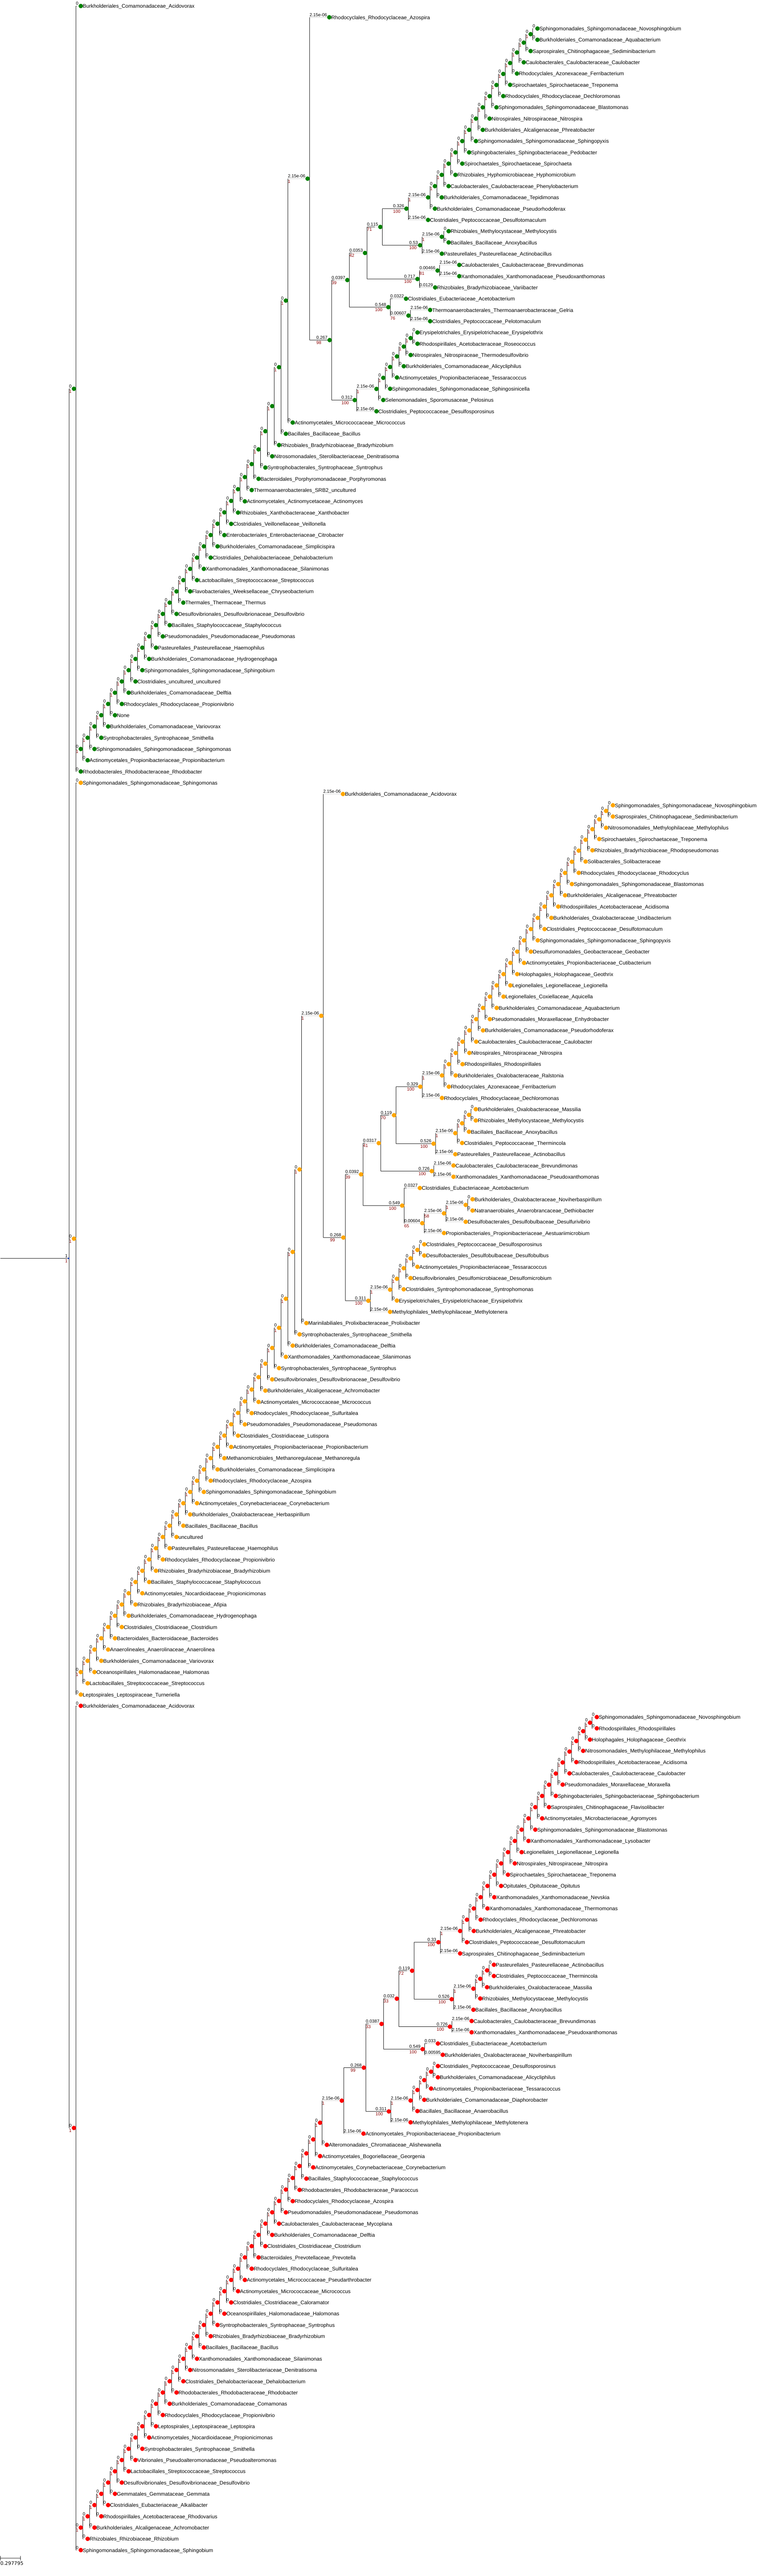

In [9]:
from IPython.display import Image
Image(filename='combined_trees.png')


In [4]:
#1. Read the trees using ete3
tree_1 = Tree("/home/beatriz/MIC/2_Micro/dataml/iqtree_1.contree")
tree_2 = Tree("/home/beatriz/MIC/2_Micro/dataml/iqtree_2.contree")
tree_3 = Tree("/home/beatriz/MIC/2_Micro/dataml/iqtree_3.contree")

# Preprocess the Newick strings to remove problematic characters
def preprocess_newick(tree):
    newick_str = str(tree)
    newick_str = newick_str.replace('|', '_')  # Replace '|' with '_'
    return newick_str

tree_1_newick = preprocess_newick(tree_1)
tree_2_newick = preprocess_newick(tree_2)
tree_3_newick = preprocess_newick(tree_3)

#2. Create a forest and convert the trees to DendroPy format
forest_newick = [tree_1_newick, tree_2_newick, tree_3_newick]
tree_list = dendropy.TreeList()
for t in forest_newick:
    tree_list.append(dendropy.Tree.get(data=t, schema="newick"))

#3. Compute the consensus tree using DendroPy
consensus_tree_dendropy = tree_list.consensus(min_freq=0.5)

# Save the DendroPy consensus tree to a temporary Newick file
temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".newick")
consensus_tree_dendropy.write_to_path(temp_file.name, "newick")

# Remove the [&U] tag from the Newick string
with open(temp_file.name, 'r') as f:
    newick_str = f.read().replace("[&U] ", "")

# Save the modified Newick string back to the temporary file
with open(temp_file.name, 'w') as f:
    f.write(newick_str)

#4. Load the saved Newick file using ete3 for visualization
consensus_tree_ete3 = Tree(temp_file.name)

# Colors for each tree
colors = ["green", "orange", "red"]

# Color the branches of the consensus tree based on their presence in the original trees
for node in consensus_tree_ete3.traverse():
    ns = NodeStyle()
    # Check which trees this node is present in
    present_in = [tree for tree in [tree_1, tree_2, tree_3] if node.get_topology_id() in [n.get_topology_id() for n in tree.traverse()]]
    if len(present_in) == 1:
        ns["fgcolor"] = colors[[tree_1, tree_2, tree_3].index(present_in[0])]
    else:
        ns["fgcolor"] = "gray"
    ns["size"] = 10
    node.set_style(ns)

# Create a TreeStyle object to set the layout
ts = TreeStyle()
ts.mode = "r"  # rectangular mode
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True

# Visualize the consensus tree
consensus_tree_ete3.show(tree_style=ts)

# Clean up the temporary file
temp_file.close()

NewickReaderMalformedStatementError: Error parsing data source on line 3 at column 4: Expecting ':', ')', ',' or ';' after reading label but found ' '

In [ ]:
print(tree_2_newick)
print(tree_3_newick)